# Data Preprocessing

In [33]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\hi\Documents\Australian_Weather.csv")
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [2]:
df.shape # The dataset has 23 features

(145460, 23)

In [3]:
print(df.info()) # Except for Date,Location columns,every column has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [4]:
print(df.describe(include=[object]))

              Date  Location WindGustDir WindDir9am WindDir3pm RainToday  \
count       145460    145460      135134     134894     141232    142199   
unique        3436        49          16         16         16         2   
top     12-11-2013  Canberra           W          N         SE        No   
freq            49      3436        9915      11758      10838    110319   

       RainTomorrow  
count        142193  
unique            2  
top              No  
freq         110316  


## Filling Null Values

In [10]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [34]:
numerical_features = [column_name for column_name in df.columns if df[column_name].dtype != 'O']

numerical_features_with_null = [feature for feature in numerical_features if df[feature].isnull().sum()]
for feature in numerical_features_with_null:
    mean_value = df[feature].mean()
    df[feature].fillna(mean_value,inplace=True)

    
categorical_features = [i for i in df.columns if df[i].dtype == 'O']
df[categorical_features].isnull().sum()
categorical_features_with_null = [feature for feature in categorical_features if df[feature].isnull().sum()]
for each_feature in categorical_features_with_null:
    mode_val = df[each_feature].mode()[0]
    df[each_feature].fillna(mode_val,inplace=True)    

## Encoding Categorical Features

In [35]:
def encode_data(feature_name):

    ''' 

    This function takes feature name as a parameter and returns mapping dictionary to replace(or map) categorical data with numerical data.

    '''

    mapping_dict = {}

    unique_values = list(df[feature_name].unique())

    for idx in range(len(unique_values)):

        mapping_dict[unique_values[idx]] = idx

    return mapping_dict
df['RainToday'].replace({'No':0, 'Yes': 1}, inplace = True)
df['RainTomorrow'].replace({'No':0, 'Yes': 1}, inplace = True)
df['WindGustDir'].replace(encode_data('WindGustDir'),inplace = True)
df['WindDir9am'].replace(encode_data('WindDir9am'),inplace = True)
df['WindDir3pm'].replace(encode_data('WindDir3pm'),inplace = True)
df['Location'].replace(encode_data('Location'),inplace = True)




<AxesSubplot:>

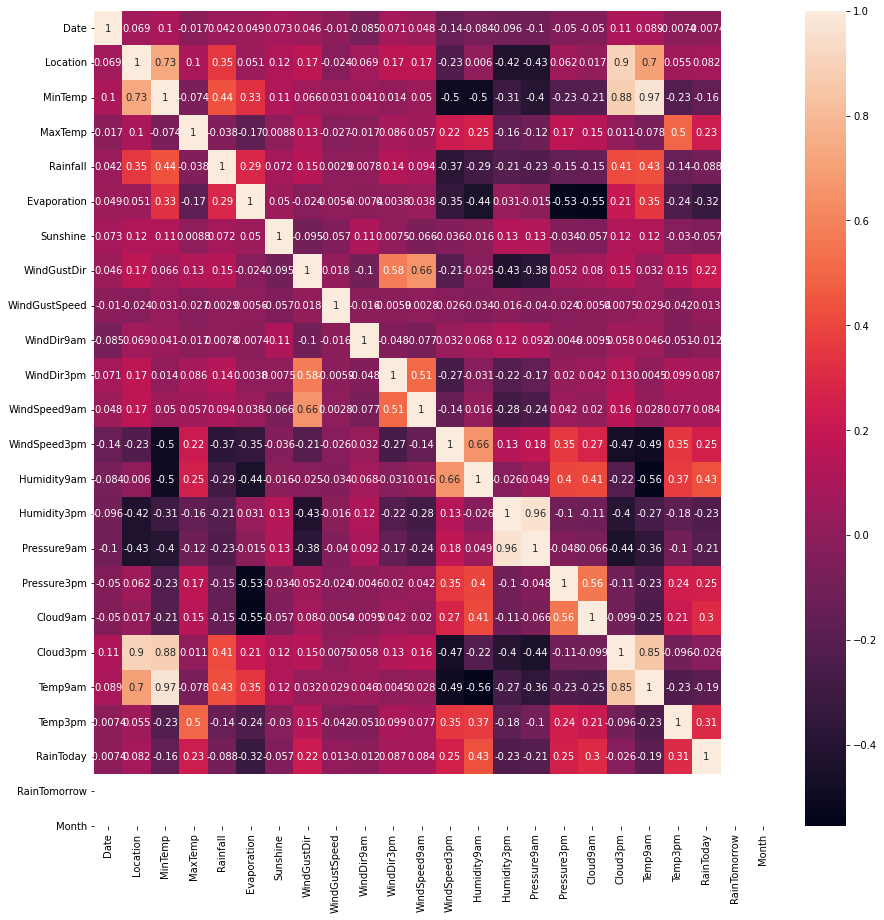

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),xticklabels=df.columns,yticklabels=df.columns,annot=True)

## Feature Significance

<AxesSubplot:>

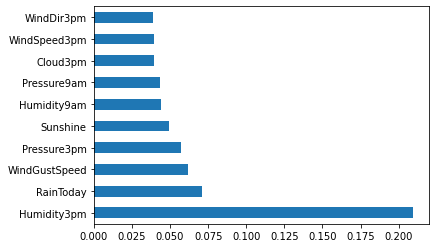

In [32]:
df.drop(df.columns[0],axis=1,inplace=True)#Dropping date column due to high no of unique values
X = df.drop(['RainTomorrow'],axis=1)
y = df['RainTomorrow']
from sklearn.ensemble import ExtraTreesRegressor
etr_model = ExtraTreesRegressor()
etr_model.fit(X,y)
etr_model.feature_importances_
feature_imp = pd.Series(etr_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')


## Rainy Season Identification  

### Creating Month Column

In [37]:
df["Date"]=pd.to_datetime(df["Date"],format="%d-%m-%Y")
conditions = [
    (df['Date'].dt.month == 1),
    (df['Date'].dt.month == 2), (df['Date'].dt.month == 3),
    (df['Date'].dt.month == 4), (df['Date'].dt.month == 5),
    (df['Date'].dt.month == 6),(df['Date'].dt.month == 7),
    (df['Date'].dt.month == 8), (df['Date'].dt.month == 9),
    (df['Date'].dt.month == 10), (df['Date'].dt.month == 11),
    (df['Date'].dt.month == 12)
    ]

# create a list of the values we want to assign for each condition
values = ['January','February','March','April','May','June','July','August','September','October','November','December']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Month'] = np.select(conditions, values)
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,2008-12-01,0,13.4,22.900000,0.6,5.468232,7.611178,0,44.00000,0,...,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0,0,December
1,2008-12-02,0,7.4,25.100000,0.0,5.468232,7.611178,1,44.00000,1,...,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0,0,December
2,2008-12-03,0,12.9,25.700000,0.0,5.468232,7.611178,2,46.00000,0,...,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0,0,December
3,2008-12-04,0,9.2,28.000000,0.0,5.468232,7.611178,3,24.00000,2,...,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0,0,December
4,2008-12-05,0,17.5,32.300000,1.0,5.468232,7.611178,0,41.00000,3,...,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0,0,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,48,2.8,23.400000,0.0,5.468232,7.611178,15,31.00000,2,...,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0,0,June
145456,2017-06-22,48,3.6,25.300000,0.0,5.468232,7.611178,4,22.00000,2,...,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0,0,June
145457,2017-06-23,48,5.4,26.900000,0.0,5.468232,7.611178,5,37.00000,2,...,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0,0,June
145458,2017-06-24,48,7.8,27.000000,0.0,5.468232,7.611178,13,28.00000,5,...,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0,0,June


In [38]:
df0=df[df["Rainfall"]!=0]
Location_list=list(set(df.Location))
df_full=pd.DataFrame()
df_temp=pd.DataFrame()

def concatenate_loop_dfs(df_temp, df_full, axis=0):
    """
    to avoid retyping the same line of code for every df.
    the parameters should be the temporary df created at each loop and the concatenated DF that will contain all
    values which must first be initialized (outside the loop). """ 
    if df_full.empty:
      df_full = df_temp
    else:
      df_full = pd.concat([df_full, df_temp], axis=axis)
    return df_full
df_final = pd.DataFrame()
for Location in Location_list:
    # The query function does a search for where
    # the @Location means the external variable, in this case the input from loop
    # then you'll have a temporary DF with only the year and sorting and getting top3
    df2 = df.query("Location == @Location")

    df_temp = df2.groupby(['Location','Month'])["Rainfall","Date"].sum().sort_values(by="Rainfall", ascending=False).head(3)
    # finally you'll call our function that will keep concating the tmp DFs
    df_final = concatenate_loop_dfs(df_temp, df_final)
df_final

C:\Users\hi\AppData\Local\Temp/ipykernel_22784/2467954185.py:23: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_temp = df2.groupby(['Location','Month'])["Rainfall","Date"].sum().sort_values(by="Rainfall", ascending=False).head(3)


Rainfall
Location Month                
0        March      594.165509
         July       559.600000
         August     553.360918
1        March      986.043673
         June       800.926427
...                        ...
47       December  1192.626427
         March     1060.882754
48       December   311.160918
         May        196.218363
         April      166.570100

[147 rows x 1 columns]

In [39]:
df_final.iloc[0:60,0]

Location  Month    
0         March         594.165509
          July          559.600000
          August        553.360918
1         March         986.043673
          June          800.926427
          January       749.726427
2         June          430.200000
          February      378.600000
          March         357.160918
3         March        1908.900000
          June         1902.800000
          February     1842.500000
4         January       770.974690
          February      583.209181
          March         550.022954
5         June         1269.200000
          April        1148.079281
          March        1097.740199
6         June         1513.404591
          March        1183.721836
          May          1022.921836
7         June         1130.400000
          August        992.800000
          February      931.965509
8         January       909.731018
          February      902.526427
          March         824.326427
9         March         930.374690


In [40]:
df_final.iloc[60:120,0]

Location  Month    
20        November      498.360918
          June          496.800000
          March         398.600000
21        November      582.400000
          September     443.600000
          October       422.200000
22        November      715.576925
          October       573.211416
          September     569.324071
23        February      322.200000
          January       309.960918
          December      290.600000
24        June          232.000000
          May           198.200000
          September     175.400000
25        July         1067.400000
          June         1037.000000
          August        996.760918
26        November      638.600000
          June          547.800000
          September     535.960918
27        July          896.800000
          August        869.760918
          June          784.200000
28        January      1795.604591
          March        1291.843673
          December     1128.800000
29        January      3854.200000


In [41]:
df_final.iloc[120:147,0]

Location  Month    
40        July         1199.800000
          June          955.200000
          August        914.800000
41        March         383.521836
          June          335.783872
          January       333.160918
42        June         1393.701117
          July         1353.531018
          May          1189.652854
43        November      553.200000
          August        548.800000
          September     545.200000
44        August        805.300000
          July          713.321836
          June          667.743673
45        January       612.521836
          December      456.082754
          February      420.400000
46        January      4081.000000
          February     3782.400000
          December     2638.600000
47        January      1215.160918
          December     1192.626427
          March        1060.882754
48        December      311.160918
          May           196.218363
          April         166.570100
Name: Rainfall, dtype: float64